# Selección de caracteristicas importantes

In [ ]:
from google.colab import files
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy.stats as stats
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
# E:\Pronostico_de_niveles_diarios_Lago_Titicaca\Input_LSTM_LT_diario.csv

uploaded = files.upload()

Saving Input_LSTM_LT_diario.csv to Input_LSTM_LT_diario.csv


In [ ]:
input_file="Input_LSTM_LT_diario.csv"

In [ ]:
# load the dataset
df = read_csv(input_file, index_col=None, delimiter=',')
df.head()

,Fecha,NLT
0,09/01/1982,3810.433
1,09/02/1982,3810.427
2,09/03/1982,3810.427
3,09/04/1982,3810.427
4,09/05/1982,3810.427


In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m/%d/%Y')
df

,Fecha,NLT
0,1982-09-01,3810.433
1,1982-09-02,3810.427
2,1982-09-03,3810.427
3,1982-09-04,3810.427
4,1982-09-05,3810.427
...,...,...
12536,2016-12-27,3808.500
12537,2016-12-28,3808.500
12538,2016-12-29,3808.505
12539,2016-12-30,3808.510


In [ ]:
df.describe()

,NLT
count,12541.000000
mean,3809.700388
std,0.887286
min,3808.100000
25%,3809.010000
50%,3809.602000
75%,3810.240000
max,3812.580000


In [ ]:
df.skew()

<ipython-input-6-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


NLT    0.621127
dtype: float64

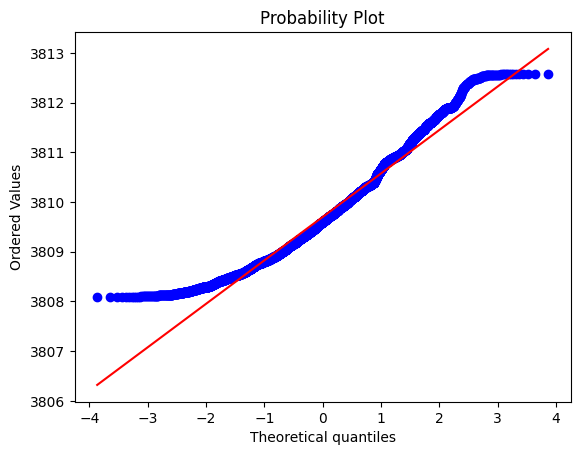

In [ ]:
stats.probplot(df['NLT'], dist="norm", plot=pylab)
pylab.show()

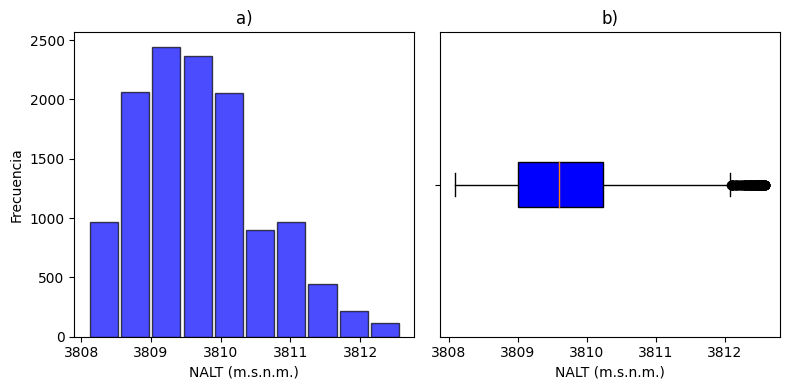

In [ ]:
# Crea una figura y dos ejes (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.hist(df['NLT'], bins=10, color='blue', alpha=0.7, rwidth=0.9, ec="black")
ax1.set_title('a)')
ax1.set_xlabel('NALT (m.s.n.m.)')
ax1.set_ylabel('Frecuencia')
bp = ax2.boxplot([df['NLT']], vert=False, patch_artist=True)
ax2.set_title('b)')
ax2.set_xlabel('NALT (m.s.n.m.)')
ax2.set_yticklabels([])
box_color = 'blue'
for box in bp['boxes']:
    box.set(facecolor=box_color)
plt.tight_layout()
plt.show()


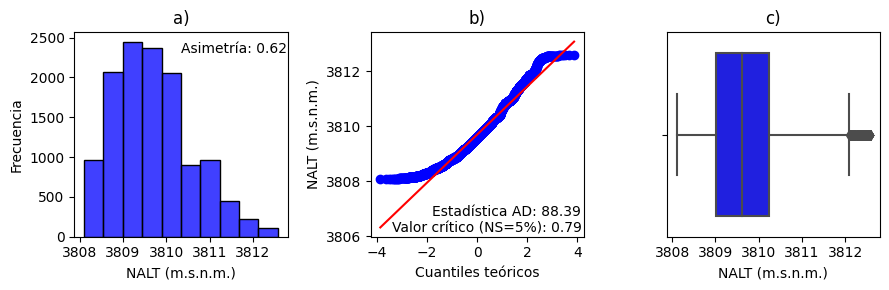

In [ ]:
# Crea una figura y tres ejes (uno para el histograma, otro para el qqplot y otro para el boxplot)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3))
sns.histplot(df['NLT'], bins=10, color='blue', ax=ax1)
ax1.set_title('a)')
ax1.set_xlabel('NALT (m.s.n.m.)')
ax1.set_ylabel('Frecuencia')

skewness = stats.skew(df['NLT'])
ax1.text(0.5, 0.9, f'Asimetría: {skewness:.2f}', transform=ax1.transAxes, fontsize=10, color='black')

stats.probplot(df['NLT'], dist="norm", plot=ax2)
ax2.set_title('b)')
ax2.set_ylabel('NALT (m.s.n.m.)')
ax2.set_xlabel('Cuantiles teóricos')
ax2.get_lines()[0].set_markerfacecolor('blue')

# Realiza la prueba de Anderson-Darling y muestra el estadístico y el valor crítico en el gráfico
result = stats.anderson(df['NLT'])
ad_statistic = result.statistic
critical_value = result.critical_values[2]
p_value = result.significance_level[2]
ax2.text(0.29, 0.1, f'Estadística AD: {ad_statistic:.2f}', transform=ax2.transAxes, fontsize=10, color='black')
ax2.text(0.1, 0.02, f'Valor crítico (NS=5%): {critical_value:.2f}', transform=ax2.transAxes, fontsize=10, color='black')
sns.boxplot(x=df['NLT'], ax=ax3, color='blue')
ax3.set_title('c)')
ax3.set_xlabel('NALT (m.s.n.m.)')
plt.tight_layout()
plt.show()

In [ ]:
# Realiza la prueba de Anderson-Darling
result = stats.anderson(df['NLT'])
print('Estadística de Anderson-Darling:', result.statistic)
print('Valores críticos:', result.critical_values)
print('Niveles de significancia:', result.significance_level)

if result.statistic > result.critical_values[2]:
    print("Los datos no siguen una distribución normal (rechazar la hipótesis nula)")
else:
    print("Los datos siguen una distribución normal (no rechazar la hipótesis nula)")

Estadística de Anderson-Darling: 88.39256493477296
Valores críticos: [0.576 0.656 0.787 0.918 1.092]
Niveles de significancia: [15.  10.   5.   2.5  1. ]
Los datos no siguen una distribución normal (rechazar la hipótesis nula)


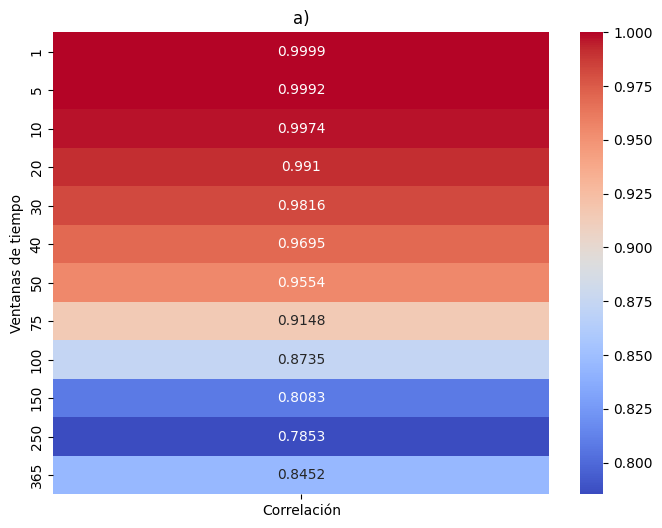

In [ ]:
# Heatmap para correlacion con Spearman

# valores look_back
look_back_values = [1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 250, 365]
correlations = []
for look_back in look_back_values:
    df[f'NLT_lag{look_back}'] = df['NLT'].shift(look_back)
    df_cleaned = df.dropna(subset=['NLT', f'NLT_lag{look_back}'])
    correlation, _ = spearmanr(df_cleaned['NLT'], df_cleaned[f'NLT_lag{look_back}'])
    correlations.append(correlation)
correlation_matrix = pd.DataFrame(correlations, index=look_back_values, columns=['Correlación'])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, vmax=1, annot=True, fmt='.4g', cmap='coolwarm', cbar=True)
plt.ylabel('Ventanas de tiempo')
plt.title('a)')
plt.show()

In [ ]:
correlation_matrix

,Correlación
1,0.999945
5,0.999243
10,0.997423
20,0.991048
30,0.981573
40,0.969497
50,0.955378
75,0.914790
100,0.873486
150,0.808262
